# AutoCorrelation Function and PACF

  **FROM CORRELATION TO AUTOCORRELATION**
- Both terms are tightly connected. Correlation measures the strength of the linear relationship between two sequences:

- The closer the correlation to +1, the stronger the positive linear relationship
- The closer the correlation to -1, the stronger the negative linear relationship
- The closer the correlation to 0, the weaker the linear relationship.
- The following figure summarizes this concept perfectly:
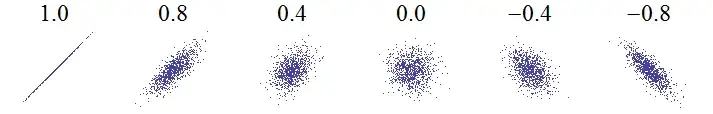

- Autocorrelation is the same, but with a twist — you’ll calculate a correlation between a sequence with itself lagged by some number of time units.


# Autocorrelation 

- Autocorrelation shows the correlation of a sequence with itself lagged by some number of time units. Once plotted, X-axis shows the lag number, and Y-axis shows the correlation of the sequence with a sequence at that lag. Y-axis ranges from -1 to 1.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# %matplotlib inline

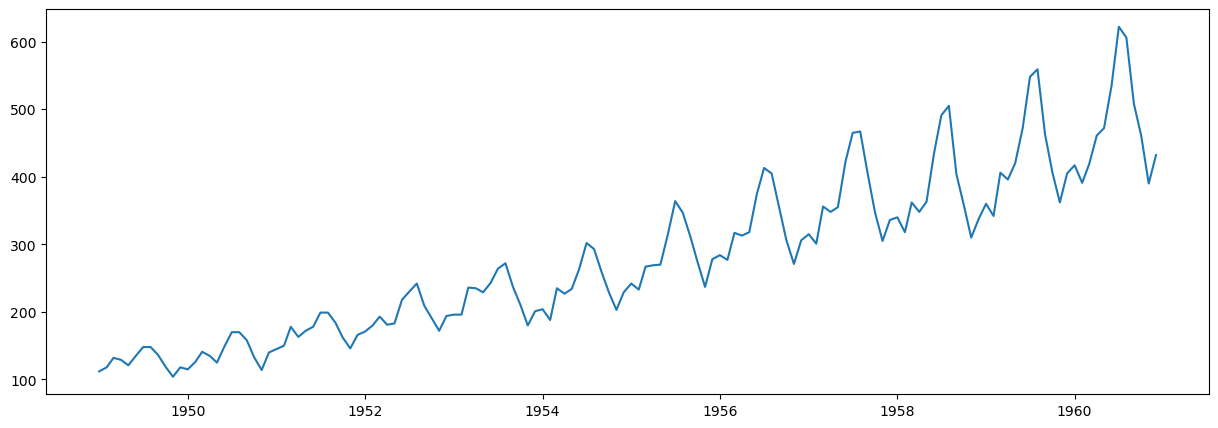

In [2]:
df = pd.read_csv("D:\dataset\AirPassengers.csv", index_col='Month', parse_dates=True)
plt.figure(figsize=(15,5))
plt.plot(df)

In [3]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
plt.rcParams['figure.figsize'] = (10,5)

- The airline passenger dataset shows the number of passengers per month from 1949 to 1960. Autocorrelation answers the following question: “How correlated is the number of passengers this month with the number of passengers in the previous month?”. Here, the previous month indicates the lag value of 1.

- You can rephrase to question and ask how correlated the number of passengers this month is to the number of passengers a year ago. Then, the lag value would be 12. And this is a great question, since yearly seasonality is visible from the chart.

- One thing to remember — the more lags you use, the lower the correlation will be. More recent periods have more impact.

- Before calculating autocorrelation, you should make the time series stationary.Stationary data indicates that mean, variance is constant.

- The easiest way to make time series stationary is by calculating the first-order difference.

**Here’s how to calculate the first-order difference:**

In [5]:
# First-order difference
df['Passengers_Diff'] = df['Passengers'].diff(periods=1)
df

,Passengers,Passengers_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [6]:
df = df.dropna()

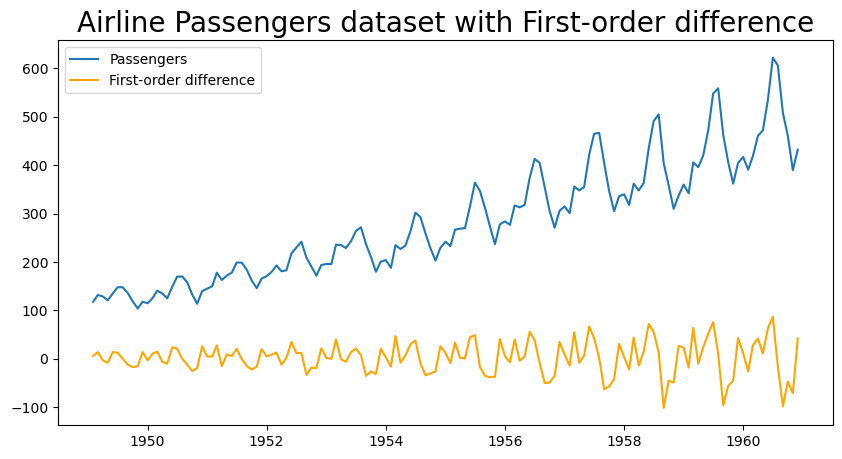

In [7]:
# Plot
plt.title('Airline Passengers dataset with First-order difference', size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff'], label='First-order difference', color='orange')
plt.legend()

In [8]:
#Calculate Autocorrelation

acf_values = acf(df['Passengers_Diff'])
np.round(acf_values,2)

array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16])

- The first value is 1, because a correlation between two identical series was calculated. But take a look at as 12th period — autocorrelation value is 0.83. This tells you a value 12 periods ago has a strong impact on the value today.

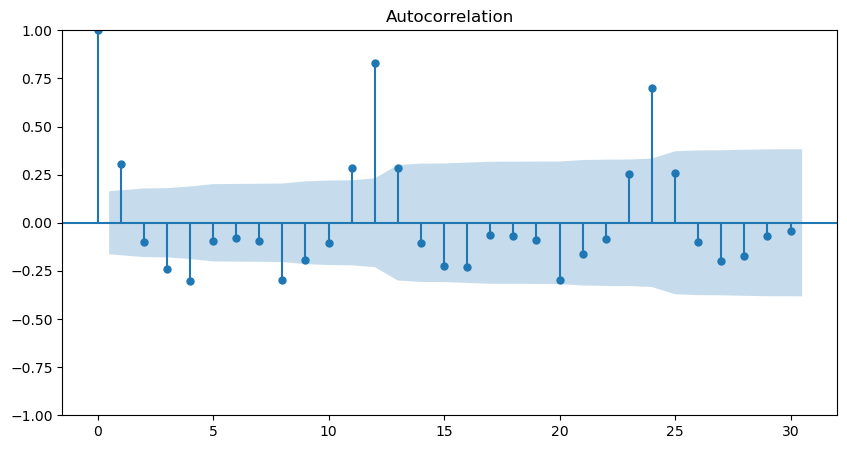

In [9]:
#Plot ACF

plot_acf(df['Passengers_Diff'], lags=30);

- The plot confirms our assumption about the correlation on lag 12. The same is visible at lag 24, but the correlation declines over time. Value 12 periods ago has more impact on the value today than value 24 periods ago does.

- Another thing to note is the shaded area. Anything inside it isn’t statistically significant.

# Partial Autocorrelation Function

- It does the same as regular autocorrelation — shows the correlation of a sequence with itself lagged by some number of time units. But there’s a twist. Only the direct effect is shown, and all intermediary effects are removed.
- For example, you want to know the direct relationship between the number of passengers today and 12 months ago. You don’t care about anything in between.
- The number of passengers 12 months affects the number of passengers 11 months ago — and the whole chain repeats until the most recent period. These indirect effects are neglected in partial autocorrelation calculations.


In [10]:
#Calculate PACF

pacf_values = pacf(df['Passengers_Diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12])

- The correlation value at lag 12 has dropped to 0.61, indicating the direct relationship is a bit weaker.

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


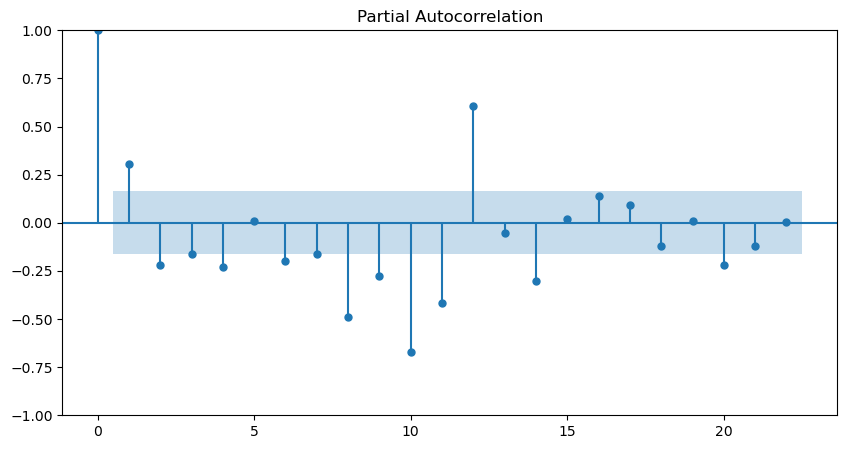

In [11]:
#Plot PACF

plot_pacf(df['Passengers_Diff']);


# Interpretation of ACF anf PACF plots

- If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.
- If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.
- If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).
- If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.